In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/DevelopmentData.csv', sep=';')
data.set_index('Unnamed: 0', inplace=True)
data.index.rename('ind', inplace=True)
data.columns

Index(['FirstObjectDistance_X', 'FirstObjectDistance_Y',
       'SecondObjectDistance_X', 'SecondObjectDistance_Y',
       'ThirdObjectDistance_X', 'ThirdObjectDistance_Y',
       'FourthObjectDistance_X', 'FourthObjectDistance_Y', 'VehicleSpeed',
       'FirstObjectSpeed_X', 'FirstObjectSpeed_Y', 'SecondObjectSpeed_X',
       'SecondObjectSpeed_Y', 'ThirdObjectSpeed_X', 'ThirdObjectSpeed_Y',
       'FourthObjectSpeed_X', 'FourthObjectSpeed_Y', 'YawRate', 'Timestamp'],
      dtype='object')

In [63]:
data_norm = data.copy()

data_norm[['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y', 'ThirdObjectDistance_X', 'ThirdObjectDistance_Y', 'FourthObjectDistance_X', 'FourthObjectDistance_Y']] = \
data[['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y', 'ThirdObjectDistance_X', 'ThirdObjectDistance_Y', 'FourthObjectDistance_X', 'FourthObjectDistance_Y']] / 128

data_norm[['VehicleSpeed', 'FirstObjectSpeed_X', 'FirstObjectSpeed_Y', 'SecondObjectSpeed_X', 'SecondObjectSpeed_Y', 'ThirdObjectSpeed_X', 'ThirdObjectSpeed_Y', 'FourthObjectSpeed_X', 'FourthObjectSpeed_Y']] = \
data[['VehicleSpeed', 'FirstObjectSpeed_X', 'FirstObjectSpeed_Y', 'SecondObjectSpeed_X', 'SecondObjectSpeed_Y', 'ThirdObjectSpeed_X', 'ThirdObjectSpeed_Y', 'FourthObjectSpeed_X', 'FourthObjectSpeed_Y']] / 256

data_norm

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
ind,,,,,,,,,,,,,,,,,,,
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0.0,-0.007812,0.000000,0.015625,0.003906,0.003906,0.027344,0.027344,0.000000,0.000000,33.241504
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0.0,-0.015625,0.000000,-0.007812,0.011719,0.000000,0.023438,0.000000,0.000000,0.000000,33.335960
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0.0,-0.011719,0.000000,-0.003906,-0.035156,0.019531,0.031250,0.000000,0.000000,0.000000,33.429725
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0.0,-0.015625,0.000000,0.000000,-0.054688,0.011719,0.046875,0.000000,0.000000,0.000000,33.522769
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0.0,0.000000,0.003906,0.000000,-0.042969,0.031250,0.062500,0.000000,0.000000,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0.0,1.093750,-0.687500,0.039062,0.132812,0.000000,0.000000,0.003906,-0.039062,-0.001343,72.804477
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0.0,2.718750,-0.597656,0.011719,0.148438,0.000000,0.000000,0.027344,-0.019531,-0.001343,72.889443
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0.0,2.632812,-0.597656,0.039062,0.121094,0.000000,0.000000,0.070312,-0.019531,-0.001343,72.972854


In [64]:
data_norm.to_csv('../data/data_norm.csv', sep=';')

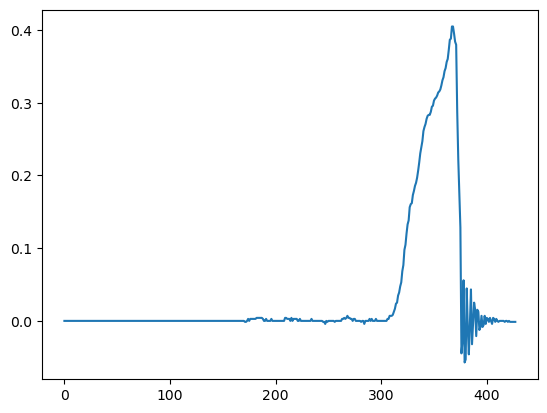

In [65]:

plt.gca().plot(data_norm[['YawRate']])

In [60]:
time_s = data_norm['Timestamp'].copy()
data_norm['prev_timestamp'] = time_s
data_norm['prev_timestamp'] = data_norm['prev_timestamp'].shift(1, fill_value=0)

data_norm['diff'] = data_norm['Timestamp'] - data_norm['prev_timestamp']

temp = data_norm['YawRate'] * data_norm['diff']
temp.sum() * (180 / np.pi)

66.56015570921701

In [30]:
import numpy as np
temp = data_norm[['YawRate']] * 0.1
temp.sum() * (180 / np.pi)

YawRate    85.294616
dtype: float64

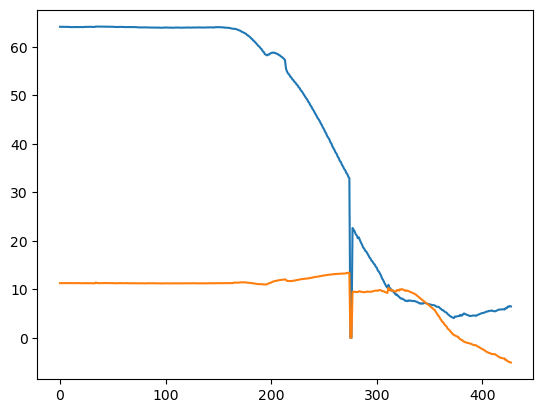

In [18]:

plt.gca().plot(data_norm[['FirstObjectDistance_X', 'FirstObjectDistance_Y']])

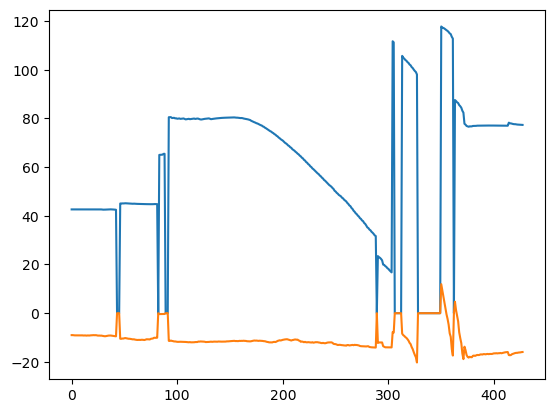

In [19]:

plt.gca().plot(data_norm[['SecondObjectDistance_X', 'SecondObjectDistance_Y']])

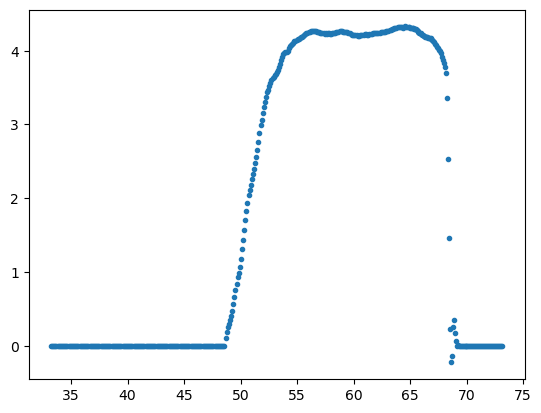

In [6]:
plt.gca().scatter(data_norm['Timestamp'], data_norm['VehicleSpeed'], marker='.')

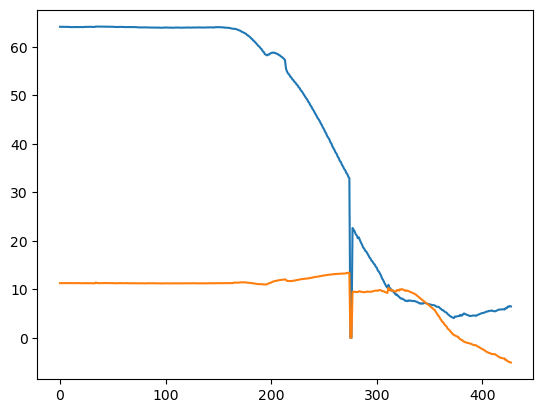

In [67]:
plt.gca().plot(data_norm[['FirstObjectDistance_X', 'FirstObjectDistance_Y']])

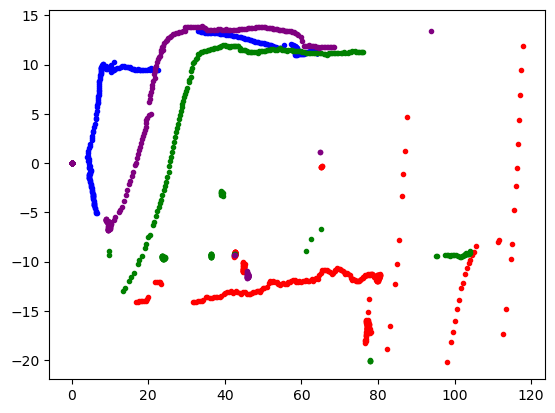

In [11]:

plt.gca().scatter(data_norm['FirstObjectDistance_X'], data_norm['FirstObjectDistance_Y'], marker='.', c='Blue')
plt.gca().scatter(data_norm['SecondObjectDistance_X'], data_norm['SecondObjectDistance_Y'], marker='.', c='Red')
plt.gca().scatter(data_norm['ThirdObjectDistance_X'], data_norm['ThirdObjectDistance_Y'], marker='.', c='Green')
plt.gca().scatter(data_norm['FourthObjectDistance_X'], data_norm['FourthObjectDistance_Y'], marker='.', c='Purple')

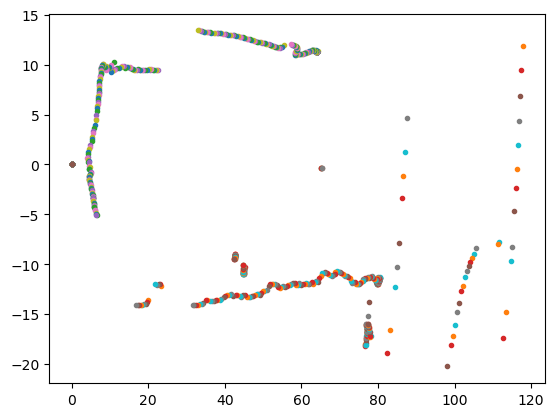

In [62]:
for e in data_norm.values:
    plt.gca().scatter(e[0], e[1], marker='.')
    plt.gca().scatter(e[2], e[3], marker='.')